In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<b> Load the data

In [2]:
df= pd.read_csv('data.csv', sep=';')

In [3]:
df.head()

,#,playerID,attempt,level,result,is_buff,payment
0,1,999,32,20,0,0,0
1,2,999,31,20,0,0,0
2,3,999,30,20,0,0,0
3,4,999,29,19,1,0,0
4,5,999,28,19,0,0,0


In [4]:
df.describe()

,#,playerID,attempt,level,result,is_buff,payment
count,49552.000000,49552.000000,49552.000000,49552.000000,49552.000000,49552.000000,49552.000000
mean,24776.500000,502.482988,40.463957,22.264207,0.493764,0.071743,0.717428
std,14304.574606,287.966866,46.671943,23.577776,0.499966,0.258064,2.580642
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,12388.750000,260.000000,13.000000,9.000000,0.000000,0.000000,0.000000
50%,24776.500000,498.500000,27.000000,18.000000,0.000000,0.000000,0.000000
75%,37164.250000,752.000000,49.000000,27.000000,1.000000,0.000000,0.000000
max,49552.000000,999.000000,397.000000,207.000000,1.000000,1.000000,10.000000


Notes:  
* There are 999 players
* is_buff=1 for 7% of records
* result=1 for 50% of records
* level<=27 for 75% of records
* No one reached level 233, highest level achived is 207

<h1> I. Levels difficulty

To define the difficulty of levels, I use following metrics:

* Average (by players) win rate on the level
* Number of players who stopped the game on the level
* How many users used the buff on the level
 

In [5]:
# lets find how many players tried each level
level_player_count = df.groupby('level')['playerID'].nunique().reset_index().rename(columns = {'playerID': 'playerCount'})

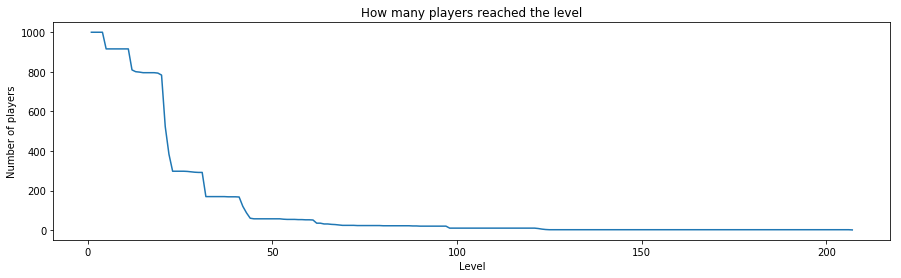

In [6]:
_, ax = plt.subplots(1, 1, figsize = (15, 4))
sns.lineplot(level_player_count.level, level_player_count.playerCount, ax=ax)
ax.set_xlabel("Level")
ax.set_ylabel("Number of players")
ax.set_title('How many players reached the level')
ax.plot();

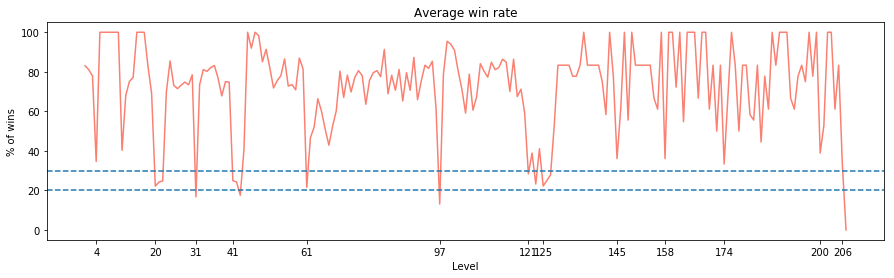

In [7]:
# Lets find average win rate
level_winrate = df.groupby(['playerID', 'level'])['result'].mean().groupby('level').mean()
level_winrate = level_winrate.reset_index().rename(columns = {'result': 'winRate'})
# And plot it
_, ax0 = plt.subplots(1, 1, figsize = (15, 4))
sns.lineplot(level_winrate.level, level_winrate.winRate*100, ax = ax0, color="salmon")
ax0.axhline(30, ls='--')
ax0.axhline(20, ls='--')
ax0.set_xticks([4,  20, 31,  41,  61,  97, 121, 125, 145, 158, 174, 200, 206])
ax0.set_xlabel("Level")
ax0.set_ylabel("% of wins")
ax0.set_title('Average win rate')
ax0.plot();

Average win rate for most of  the levels is high. However, there are levels with win rate less than 30% and even 20%. <br>
Also, there is no correlation between level index and win rate. <br>

Levels with win rate < 30%   -  (20,  21,  22,  31,  41,  42,  43,  61,  97, 121, 123, 125, 126, 127, 207)


In [8]:
print('Number of levels with win rate <50%  -  {}'.format(level_winrate[level_winrate.winRate<0.5].shape[0]))
print('Number of levels with win rate <30%  -  {}'.format(level_winrate[level_winrate.winRate<0.3].shape[0]))
print('Number of levels with win rate <20%  -  {}'.format(level_winrate[level_winrate.winRate<0.2].shape[0]))

Number of levels with win rate <50%  -  28
Number of levels with win rate <30%  -  15
Number of levels with win rate <20%  -  4


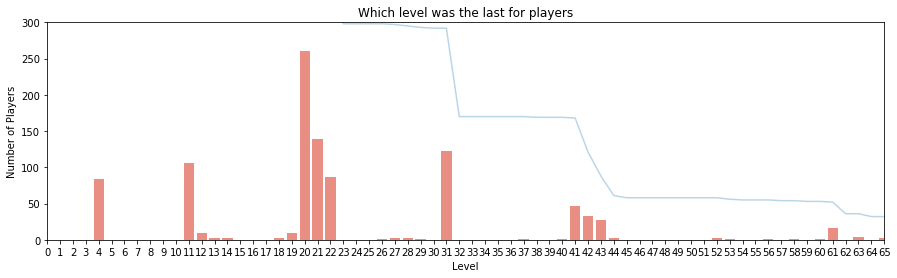

In [9]:
# Lets find how many players leave the game on each level
last_level = df.groupby('playerID')['level'].max().reset_index()
last_level = last_level.groupby('level').count().rename(columns = {'playerID': 'playerCount'})
last_level = last_level.reindex(pd.RangeIndex(last_level.index.max() + 1)).fillna(0)
# And  show barplot
_, ax1 = plt.subplots(1, 1, figsize = (15, 4))
sns.barplot(last_level.index, last_level.playerCount, ax = ax1, color="salmon")
sns.lineplot(level_player_count.level, level_player_count.playerCount, ax=ax1, alpha= 0.3)
ax1.set_xlim(0, 65)
ax1.set_ylim(0, 300)
ax1.set_xlabel("Level")
ax1.set_ylabel("Number of Players")
ax1.set_title('Which level was the last for players')
ax1.plot();

We can see that most of players highest acheived levels are   (4, 11, 20, 21, 22, 31, 41, 42, 43, 61, ...)

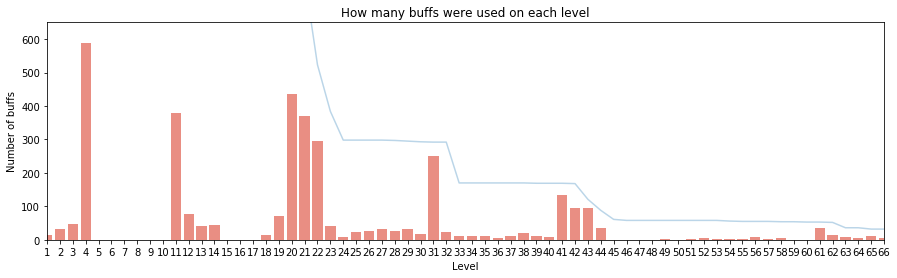

In [10]:
# Lets find how many buffs were used on each level
level_buff_count = df.groupby('level')['is_buff'].sum().reset_index()
level_buff_count = level_buff_count.rename(columns = {'is_buff': 'buffCount'})
# And  show barplot
_, ax2 = plt.subplots(1, 1, figsize = (15, 4))
sns.barplot(level_buff_count.level, level_buff_count.buffCount, ax = ax2, color="salmon")
sns.lineplot(level_player_count.level, level_player_count.playerCount, ax=ax2, alpha= 0.3)
ax2.set_xlim(0, 65)
ax2.set_ylim(0, 650)
ax2.set_xlabel("Level")
ax2.set_ylabel("Number of buffs")
ax2.set_title('How many buffs were used on each level')
ax2.plot();

We can see that most buffs were used on levels  (4, 11, 12, 19, 20, 21, 22, 31, 41, 42, 43, 61 ....)

<b> CONCLUSION: </b>  <br>
1. All of 3 metrics show that most of the level are EASY. 
2. But there are several  HARD levels that force players to replay it several times, get buff to pass it. 
3. A lot of players stoped playing the game after they reached hard level. <br>
4. List of hard levels:  4, 11, 20, 21, 22, 31, 41, 42, 43, 61, 97, 121, 123, 125, 126, 127, 207




In [11]:
hard_levels = (4, 11, 20, 21, 22, 31, 41, 42, 43, 61, 97, 121, 123, 125, 126, 127, 207)

<h1> II. Players base </h1> <br>

I suggest the next classification of players: <br>

* Players who are not ready to use buff
* Players who are ready to use buff (to pay)
    - Players who have used buff only once or twice, but then left
    - Players who have used buffs several times (>2)

Lets find how big each group is

<b> Players who never used buff

In [12]:
player_buff_count = df.groupby('playerID')['is_buff'].sum()
player_zero_buff = player_buff_count[player_buff_count==0].index
print('Number of players who never used buff - {}'.format(len(player_zero_buff)))
print('Number of players who never used buff - {}'.format(len(player_zero_buff)))

Number of players who never used buff - 223
Number of players who never used buff - 223


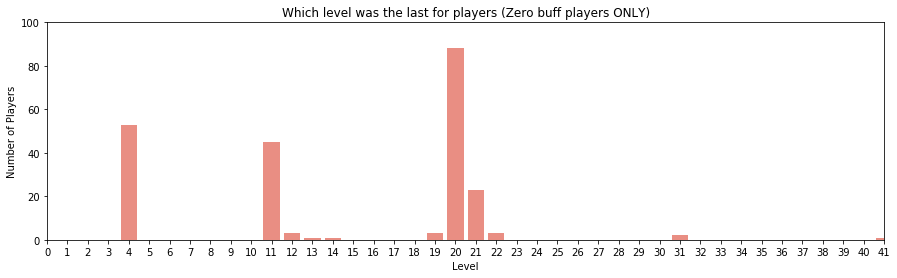

In [13]:
# Filter zero buff players 
df_zero_buff = df[df.playerID.isin(player_zero_buff)]
# Lets find how many players leave the game on each level
last_level = df_zero_buff.groupby('playerID')['level'].max().reset_index()
last_level = last_level.groupby('level').count().rename(columns = {'playerID': 'playerCount'})
last_level = last_level.reindex(pd.RangeIndex(last_level.index.max() + 1)).fillna(0)
# And  show barplot
_, ax3 = plt.subplots(1, 1, figsize = (15, 4))
sns.barplot(last_level.index, last_level.playerCount, ax = ax3, color="salmon")
ax3.set_xlim(0, 41)
ax3.set_ylim(0, 100)
ax3.set_xlabel("Level")
ax3.set_ylabel("Number of Players")
ax3.set_title('Which level was the last for players (Zero buff players ONLY)')
ax3.plot();

Most of the players stopped playing after they reached hard levels : 4, 11, 12, 19, 20, 21, 22, 31

<b> Players who used buffs

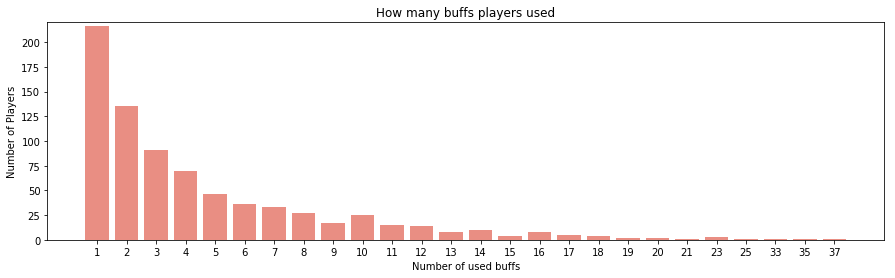

In [14]:
# Filter players who used at least 1 buff
player_buff_count = df.groupby('playerID')['is_buff'].sum()
buff_count = player_buff_count.reset_index().groupby('is_buff')['playerID'].count().reset_index()
buff_count = buff_count.rename(columns = {'is_buff': 'buffCount', 'playerID': 'playerCount'}).drop(0)
# And show barplot
_, ax4 = plt.subplots(1, 1, figsize = (15, 4))
sns.barplot(buff_count.buffCount, buff_count.playerCount, ax = ax4, color="salmon")
# ax4.set_xlim(0, 38)
ax4.set_ylim(0, 220)
ax4.set_xlabel("Number of used buffs")
ax4.set_ylabel("Number of Players")
ax4.set_title('How many buffs players used')
ax4.plot();

In [15]:
for _ in range(1,10):
    print('Number of players who used only {} buff  - {}'.format(_, buff_count[buff_count.buffCount==_]['playerCount'].values[0]))

Number of players who used only 1 buff  - 216
Number of players who used only 2 buff  - 135
Number of players who used only 3 buff  - 91
Number of players who used only 4 buff  - 70
Number of players who used only 5 buff  - 46
Number of players who used only 6 buff  - 36
Number of players who used only 7 buff  - 33
Number of players who used only 8 buff  - 27
Number of players who used only 9 buff  - 17


Lets compare players who used one ot two buffs with players who used  >2 buffs

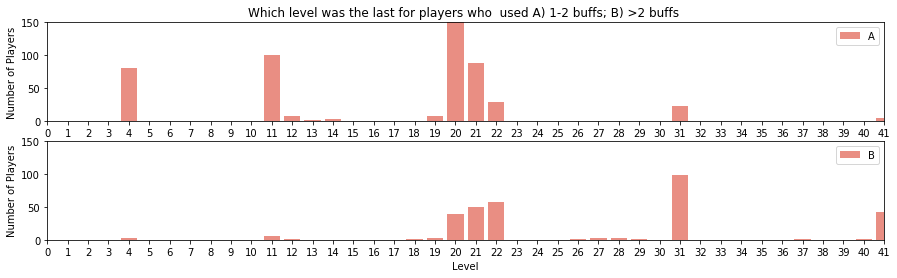

In [16]:
# Filter one-two buff players 
df_two_buff = df[df.playerID.isin(player_buff_count[player_buff_count<3].index)]
# Lets find how many players leave the game on each level
last_level_1 = df_two_buff.groupby('playerID')['level'].max().reset_index()
last_level_1 = last_level_1.groupby('level').count().rename(columns = {'playerID': 'playerCount'})
last_level_1 = last_level_1.reindex(pd.RangeIndex(last_level.index.max() + 1)).fillna(0)
# Filter one-two buff players 
df_several_buff = df[df.playerID.isin(player_buff_count[player_buff_count>2].index)]
# Lets find how many players leave the game on each level
last_level_2 = df_several_buff.groupby('playerID')['level'].max().reset_index()
last_level_2 = last_level_2.groupby('level').count().rename(columns = {'playerID': 'playerCount'})
last_level_2 = last_level_2.reindex(pd.RangeIndex(last_level.index.max() + 1)).fillna(0)
# And  show barplot
_, (ax5, ax6) = plt.subplots(2, 1, figsize = (15, 4))
sns.barplot(last_level_1.index, last_level_1.playerCount, ax = ax5, color="salmon", label = 'A')
ax5.legend()
sns.barplot(last_level_2.index, last_level_2.playerCount, ax = ax6, color="salmon", label = 'B')
ax6.legend()
ax5.set_xlim(0, 41)
ax5.set_ylim(0, 150)
ax5.set_xlabel("")
ax5.set_ylabel("Number of Players")
ax5.set_title('Which level was the last for players who  used A) 1-2 buffs; B) >2 buffs ')
ax6.set_xlim(0, 41)
ax6.set_ylim(0, 150)
ax6.set_xlabel("Level")
ax6.set_ylabel("Number of Players")
ax6.plot();

<b> CONCLUSION: </b> <br><br>
<b>1. Players who never used buff.</b> Most of them stopped the game on hard levels (4, 11, 20, 21). <br>
<b>2. Players who used buff once or twice. </b> A lot of them stopped the game after levels 4 and 11. Probably, beacause they used buff, but it didn't help them win.  <br>
<b>3. Player who used buff more than 2 times. </b> Most of them passed levels 4 and 11, but then left the game on levels 20, 21, 22, 31, 41. In generally, those players are ready to pay, but 3 hard levels in a row make them stop.

<h1> III. How does the buff work?

Lets check if buffs really help to pass hard levels

In [17]:
print('Average number of passed levels, when the buff was used - {}%'.format(round(df[df.is_buff==1]['result'].mean()*100)))
print('Average number of passed levels, without the buff - {}%'.format(round(df[df.is_buff==0]['result'].mean()*100)))

Average number of passed levels, when the buff was used - 70%
Average number of passed levels, without the buff - 48%


It means, the buff doesn't guarantee the win, but in general it increase the chances.<br>

Now lets check if buff helps equally on easy and hard levels.

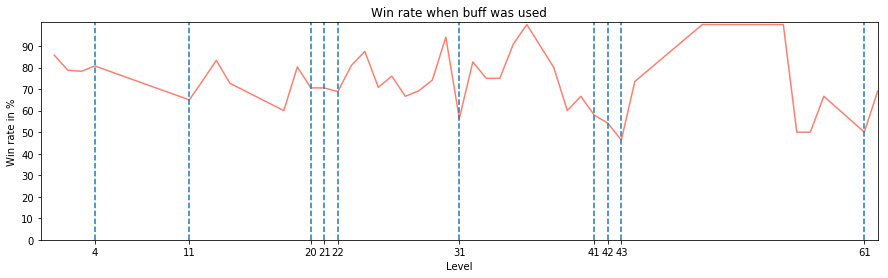

In [18]:
# Lets find winrate by level when buff was used
level_buff_winrate = df[df.is_buff==1].groupby('level')['result'].mean().reset_index().rename(columns ={'result': 'winRate'})
# And show plot
_, ax7= plt.subplots(1, 1, figsize = (15, 4))
sns.lineplot(level_buff_winrate.level, level_buff_winrate.winRate*100, ax = ax7, color="salmon")
for _ in hard_levels:
    ax7.axvline(_, ls='--')
ax7.set_xticks(hard_levels)
ax7.set_yticks(np.arange(0,100,10))
ax7.set_ylim(0, 101)
ax7.set_xlim(0, 62)
ax7.set_xlabel("Level")
ax7.set_ylabel("Win rate in %")
ax7.set_title('Win rate when buff was used')
ax7.plot();

Win rate when the buff was used: <br>
* about 80% for level 4
* about 70% for levels 11, 20, 21, 22
* less then 60% for levels 31, 41, 42, 43, 61

How lets check what happens when player pay for buff, but doesn't win.

In [19]:
# For each player find max level when he used buff and failes
player_fail_buff = df[(df.is_buff==1)&(df.result==0)].groupby('playerID')['level'].max().to_frame()
player_fail_buff = player_fail_buff.rename(columns = {'level': 'levelBuffFail'})
# And concate it with last level player tried
player_fail_buff['lastLevel'] = df[df.playerID.isin(player_fail_buff.index)].groupby('playerID')['level'].max()

In [20]:
print('Correlation beetwen index of last played level and last failed buff level - {}'.format(player_fail_buff.corr().iloc[0,1]))

Correlation beetwen index of last played level and last failed buff level - 0.8895791932511946


In [21]:
print('Number of players who leave the game after failed buff - {}'.format(sum(player_fail_buff['levelBuffFail']==player_fail_buff['lastLevel'])))
print('Total number of players who used buff and failed - {}'.format(player_fail_buff.shape[0]))

Number of players who leave the game after failed buff - 376
Total number of players who used buff and failed - 543


<b> CONCLUSION: </b> <br>
1. Buff doesn't garantee the win, but in general it increase the chances 
2. Harder the level, lesser chanse the buff will help
3. 70% of players stop the game when they bought the buff and it doesn't help

<h1> IV. Game mechanics </h1><br>

<b>1. It is free-to-play game with optional donations<br>
<b>2. Difficulty of levels in the game is unbalanced - there are lots of easy levels and several really hard <br>
<b>3. It seems unlikely to pass some levels without the buff<br>

For example, no one passed level 97 without the buff

In [22]:
df[(df.level==97)].groupby('is_buff')['result'].sum()

is_buff
0     0
1    11
Name: result, dtype: int64

<b>4. It possible that the game becomes unfair, when player doing too well without buffs

For example, lets look at players with good win rate who never used buff. All of them stop the game on hard levels 11, 19 - 21

In [23]:
player_zero_buff_winrate = df[df.playerID.isin(player_zero_buff)].groupby('playerID')['result'].mean().sort_values()
df[df.playerID.isin(player_zero_buff_winrate[player_zero_buff_winrate>0.7].index)].groupby('playerID')['level'].max()

playerID
29     20
324    20
418    21
420    20
461    19
624    20
631    20
673    11
949    20
Name: level, dtype: int64

<h1> V.  How to improve game mechanics (to increase income)

My suggestions: <br>
1. Move levels 4 and 11 to a higher position or make them not so difficult. For now 4 and 11 seems too hard for rookies, even with the buff doesn't help to win.
2. There are three hard levels  in a row (21, 22, 23). Need to increase distance between them, because some user might think that now you need buff all the time and they quit.
3. The same about levels (41, 42, 43)
4. After above changes, It make sense to send extra buff to players who stop the game on hard level and make sure they'll pass it. It increase chances that they will buy the buff on the next hard level.